# IPPP Project  - Do Cash Transfers Increase Ownership of Agricultural Assets and Consumption?
        
        Project Team: 
        Divyasha Ray | divyasha@uchicago.edu 
		Riddhima Mishra | riddhimamishra@uchicago.edu 
		Alejandra López Rodríguez | alejandralr@uchicago.edu 

Our project is based on the study [Investing Cash Transfers to Raise Long-Term Living Standards](https://www.povertyactionlab.org/sites/default/files/publications/489%20CCT%20Long%20Term%20in%20MExico%20AEJ2012.pdf) by Gertler, Martinez, and Rubio-Codina on the impact of conditional cash transfers on long term living standards of beneficiaries in Mexico. The identification strategy exploits the fact that the implementation of the program was done in waves, adding more comunities as beneficiaries on each wave. 
We take the data from the paper to look into the impact of cash transfers in two outcomes: agricultural productivity and consumption.


### Treatment
The Oportunidades program is a conditional cash transfer for poor households in Mexico. The transfers are tied to the households' compliance with medical appointments, school attendance of children, among other conditions. The dummy variable t2_c1_op identifies the treatment and control groups.

### Data
Our analysis uses panel data from the program's rural evaluation surveys, and the national census. The dataset called investments contains information for the household's ownership of agricultural assets such as land and draft animals. It also contains basic socioeconomic household information. The investments dataset has 157,971 observations.

The evaluation sample includes 506 rural communities in 7 states. Communities were randomly assigned to treatment (320 communities) and control (186 communities)groups, which were phased into the program at different points in time as part of the program´s national scale-up. 


### Sample Balance

The evaluation uses data from a Randomized Control Trial of the "Oportunidades" cash transfer program in Mexico. First, we present some descriptive statistics to show balance between the treatment and control groups.

Eligible households in the treatment group began receiving benefits starting March/April of 1998. Therefore, we compute descriptive statistics for 1997 year. In the data this
equals to rows where wave variable is equal to 0. We also only look at the households which were eligible for the cash transfers program, as only eligible households were part of the studyself.
Thus, we filter the data where wave=0 and ineligible column=1. We computed descriptive statistics for variables related to agricultural assets and head of the household characteristics.
Comments in the codes explains necessary cleaning required for creating the summary stats tables.

#### Agricultural asset characteristics

In [92]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [93]:
#Reading stata files without value labels

inv_2 = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

#Panel A: Agricultural assets

#Breaking panel A into two parts--Treatment and control
#Masking for treatment group, treatment variable =t2_c1_op, where 1= treatment, 0=control

inv_2_t1 = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2["t2_c1_op"] == 1) ]



In [94]:
#Panel A: Treatment group Set 1

agri=['ani197', 'ani297', 'land97']

data_t={'Agricultural_assests':['Drafts animals ownership', 'Production animal ownership', 'Land Use'],
        'N_t':[],
      'Mean_t':[],
      'SD_t':[]}
for var in agri:
    count=(inv_2_t1[var].count())
    data_t['N_t'].append(count)
    mean=(inv_2_t1[var].mean())*100
    data_t['Mean_t'].append(mean)
    std=(inv_2_t1[var].std())
    data_t['SD_t'].append(std)


summ_stats_t1=pd.DataFrame(data_t,columns=['Agricultural_assests','N_t','Mean_t','SD_t'])


In [95]:
#Panel A: Treatment group 2nd set

agri_2=['vani197', 'vani297', 'ha97']

data_t={'Agricultural_assests':['Monetary value of draft animals','Monetary value production animals','Number hectares used'],
        'N_t':[],
      'Mean_t':[],
      'SD_t':[]}

for x in agri_2:
    inv_2_t2 = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2[x] >0) &(inv_2["t2_c1_op"] == 1)]
    count=(inv_2_t2[var].count())
    data_t['N_t'].append(count)
    mean=(inv_2_t2[var].mean())*100
    data_t['Mean_t'].append(mean)
    std=(inv_2_t2[var].std())
    data_t['SD_t'].append(std)

summ_stats_t2=pd.DataFrame(data_t,columns=['Agricultural_assests','N_t','Mean_t','SD_t'])


In [96]:
#Joining Panel A treatment group statistics together

panel_a_t=pd.concat([summ_stats_t1, summ_stats_t2], axis=0)


In [97]:
#Panel A: control group
#Masking for control group

inv_2_c = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2["t2_c1_op"] == 0) ]

#Panel A: Contol group Set 1


data_c={'N_c':[],
      'Mean_c':[],
      'SD_c':[]}
for var in agri:
    count=(inv_2_c[var].count())
    data_c['N_c'].append(count)
    mean=(inv_2_c[var].mean())*100
    data_c['Mean_c'].append(mean)
    std=(inv_2_c[var].std())
    data_c['SD_c'].append(std)

summ_stats_c1=pd.DataFrame(data_c,columns=['N_c','Mean_c','SD_c'])



In [98]:
#Panel A Contol group Set 2


data_c={'N_c':[],
      'Mean_c':[],
      'SD_c':[]}

for x in agri_2:
    inv_2_c = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2[x] >0) &(inv_2["t2_c1_op"] == 0)]
    count=(inv_2_c[var].count())
    data_c['N_c'].append(count)
    mean=(inv_2_c[var].mean())*100
    data_c['Mean_c'].append(mean)
    std=(inv_2_c[var].std())
    data_c['SD_c'].append(std)



summ_stats_c2=pd.DataFrame(data_c,columns=['N_c','Mean_c','SD_c'])



In [99]:
#Getting the control together

panel_a_c=pd.concat([summ_stats_c1, summ_stats_c2], axis=0)



In [100]:
#Getting the treatment and control group together
panel_a=pd.concat([panel_a_t, panel_a_c], axis=1)

print(panel_a)


                Agricultural_assests   N_t      Mean_t      SD_t   N_c  \
0           Drafts animals ownership  7658   34.486811  0.475356  4644   
1        Production animal ownership  7656   80.721003  0.394515  4643   
2                           Land Use  7658   59.114651  0.491654  4644   
0    Monetary value of draft animals  2633   77.288264  0.419049  1472   
1  Monetary value production animals  6172   63.447829  0.481615  3773   
2               Number hectares used  4432  100.000000  0.000000  2543   

       Mean_c      SD_c  
0   31.761413  0.465599  
1   81.455955  0.388696  
2   56.029285  0.496405  
0   77.038043  0.420731  
1   61.542539  0.486559  
2  100.000000  0.000000  


#### T-test
After looking at the descriptive characteristics by treatment and control group. We tested if there were statistically significant difference
between the two groups.

In [102]:
#Running TTest individually for ani and land as ani297 needs cleaning

agri_subset=['ani197','land97']

for a in agri_subset:
    print(stats.ttest_ind(a=inv_2_t1[a],
                b=inv_2_c[a]))

Ttest_indResult(statistic=-8.5075060977388848, pvalue=2.0265295370164805e-17)
Ttest_indResult(statistic=-41.934057731300307, pvalue=0.0)


In [89]:
#Cleaning ani297 to run the TTest

#converting all values to numeric to ignore unwanted values

inv_2_t1['ani297']=pd.to_numeric(inv_2_t1['ani297'], errors='coerce')
inv_2_c['ani297']=pd.to_numeric(inv_2_c['ani297'], errors='coerce')

#removing Na

inv_2_t1.dropna(subset=['ani297'], inplace=True)
inv_2_c.dropna(subset=['ani297'], inplace=True)


print(stats.ttest_ind(a=inv_2_t1['ani297'],
                b=inv_2_c['ani297']))



Ttest_indResult(statistic=-10.430068442645005, pvalue=2.4239524119732447e-25)


/Users/alejandralopez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/alejandralopez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alejandralopez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [90]:
#Panel A Set 2: TTests
for x in agri_2:
    inv_2_t2 = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2[x] >0) &(inv_2["t2_c1_op"] == 1)]
    inv_2_c2 = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2[x] >0) &(inv_2["t2_c1_op"] == 0)]
    print(stats.ttest_ind(a=inv_2_t2[x],
                b=inv_2_c2[x]))


Ttest_indResult(statistic=1.2944644499645681, pvalue=0.1955778875135549)
Ttest_indResult(statistic=0.41531993728709432, pvalue=0.67791666971959263)
Ttest_indResult(statistic=-4.9299502938398305, pvalue=8.4150934513888061e-07)


Except the land use, all the other characteristics are statistically similar between the control and treatment group. We believe even though
the difference for land use is significant, the difference in avergae is 3 i.e. on an average there were 3 more houesholds that used land in the
treatment group compared to control group. We believe given the size of the sample this shouldn't impact our regression results.

#### Head of the household characteristics

Besides looking at the outcome variables for the study, we also looked at other household characteristics that might impact the results. In particular we look at
household head characteristics that includes age, gender, and education variables.


In [103]:
#PAnel B: Head of HH characteristics

# Masking for wave and eligibility
inv_2 = inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0)]

#Taking care of any missing values
inv_2.dropna(subset=['age_hh', 'female_hh', 'ethnicity_hh', 'educ_hh'], inplace=True)

#Creating new dummy variables for education

import numpy as np
inv_2['educ_0']=np.where(inv_2['educ_hh'] <=0.5, 1, 0)
inv_2['educ_1']=np.where((inv_2['educ_hh'] >=0.5) & (inv_2['educ_hh'] <=5), 1, 0)
inv_2['educ_2']=np.where(inv_2['educ_hh'] ==6, 1, 0)
inv_2['educ_3']=np.where((inv_2['educ_hh'] >=7) & (inv_2['educ_hh'] <=18), 1, 0)


hh_char=['age_hh', 'female_hh', 'ethnicity_hh', 'educ_0', 'educ_1', 'educ_2', 'educ_3']


In [104]:
#Treatment group


#Creating a seperate dataframe for the treatment group
inv_2_t=inv_2.loc[inv_2["t2_c1_op"] == 1]

data_t={'Head of HH characteristics':['Age', 'Female','Indigenous','Never attended school','Primary school not completed','Primary school completed','More than Primary School'],
        'N_t':[],
        'Mean_t':[],
        'SD_t':[]}
for var in hh_char:
    count=(inv_2_t[var].count())
    data_t['N_t'].append(count)
    mean=(inv_2_t[var].mean())*100
    data_t['Mean_t'].append(mean)
    std=(inv_2_t[var].std())
    data_t['SD_t'].append(std)


summ_stats_t=pd.DataFrame(data_t,columns=['Head of HH characteristics','N_t','Mean_t','SD_t'])



In [105]:
#control group
inv_2_c=inv_2.loc[inv_2["t2_c1_op"] == 0]

data_c={'N_c':[],
      'Mean_c':[],
      'SD_c':[]}
for var in hh_char:
    count=(inv_2_c[var].count())
    data_c['N_c'].append(count)
    mean=(inv_2_c[var].mean())*100
    data_c['Mean_c'].append(mean)
    std=(inv_2_c[var].std())
    data_c['SD_c'].append(std)

summ_stats_c=pd.DataFrame(data_c,columns=['N_c','Mean_c','SD_c'])

panel_b=pd.concat([summ_stats_t, summ_stats_c], axis=1)
print(panel_b)


     Head of HH characteristics   N_t       Mean_t       SD_t   N_c  \
0                           Age  7658  4194.868469  14.130675  4644   
1                        Female  7658     8.161400   0.273794  4644   
2                    Indigenous  7658    41.838600   0.493326  4644   
3         Never attended school  7658    31.339775   0.463905  4644   
4  Primary school not completed  7658    46.644032   0.498905  4644   
5      Primary school completed  7658    16.884304   0.374638  4644   
6      More than Primary School  7658     5.327762   0.224601  4644   

        Mean_c       SD_c  
0  4233.441162  14.519606  
1     8.397933   0.277387  
2    43.626184   0.495974  
3    32.601206   0.468802  
4    47.265289   0.499305  
5    15.568475   0.362595  
6     4.995693   0.217879  


#### T-test

In [106]:
for x in hh_char:
    print(stats.ttest_ind(a=inv_2_t[x],
                b=inv_2_c[x]))



Ttest_indResult(statistic=-1.4524547754462007, pvalue=0.14640070341055741)
Ttest_indResult(statistic=-0.46219955282284875, pvalue=0.64394639906375151)
Ttest_indResult(statistic=-1.9443193606479814, pvalue=0.051879719035263283)
Ttest_indResult(statistic=-1.4561880620897258, pvalue=0.1453661627712905)
Ttest_indResult(statistic=-0.66932521689195656, pvalue=0.50330060724387127)
Ttest_indResult(statistic=1.9114001282863315, pvalue=0.055976395569745728)
Ttest_indResult(statistic=0.80393115874379351, pvalue=0.42145227032814503)


#### Since, all the p values are greater than .05, we can conclude that the control and treatment group are statiscally similar for head of household characteristics.

### Summary Plots

Since, our outcome variables only include the Panel A: Agricultural assets variables, we thought it would also be good to look at their distribution across control and treatment group.


In [107]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


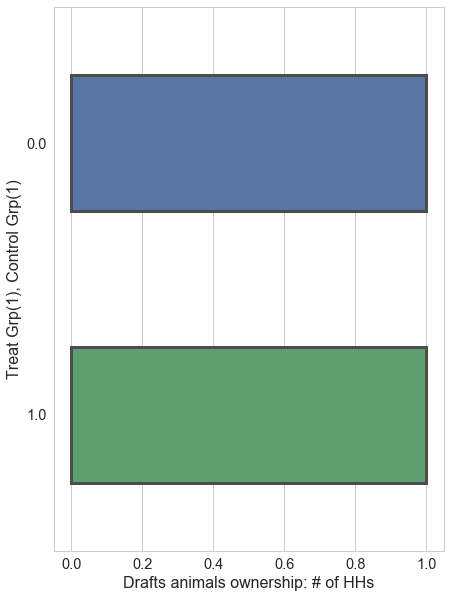

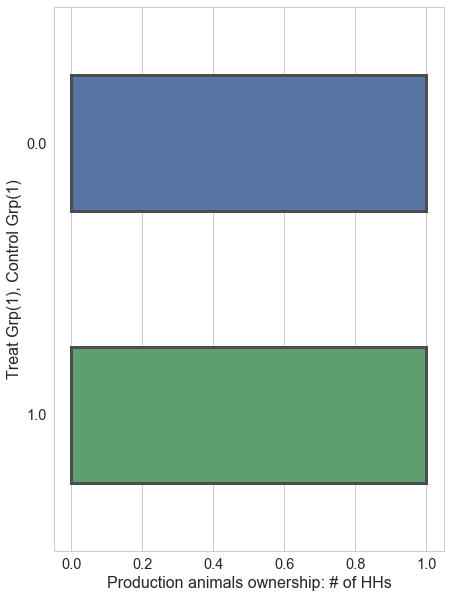

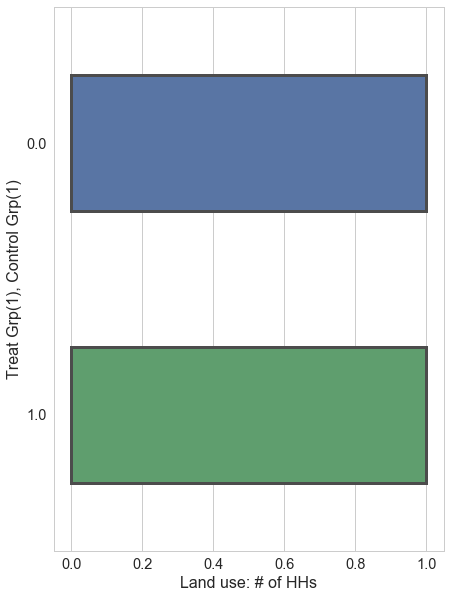

In [108]:

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 10)})

#Plotting first set of Dependent variables

#renaming the columns
inv_2.rename(columns={'ani197':'Drafts animals ownership', 'ani297':'Production animals ownership','land97':'Land use'}, inplace=True)

#First set of dependent variables

agri=['Drafts animals ownership','Production animals ownership','Land use']

for x in agri:
    k=sns.boxplot(data=inv_2, x='t2_c1_op', y=x,width=.5,orient='h')
    k.set_ylabel("Treat Grp(1), Control Grp(1)")
    k.set_xlabel("{}: # of HHs".format(x))
    plt.show()



In [110]:
#Second set of dependent variables
#Reading the data as before

inv_2 = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

inv_2.rename(columns={'vani197':'Value of draft animals (pesos)','vani297':'Value of prod. animals (pesos)','ha97':'Number of hectares used'}, inplace=True)



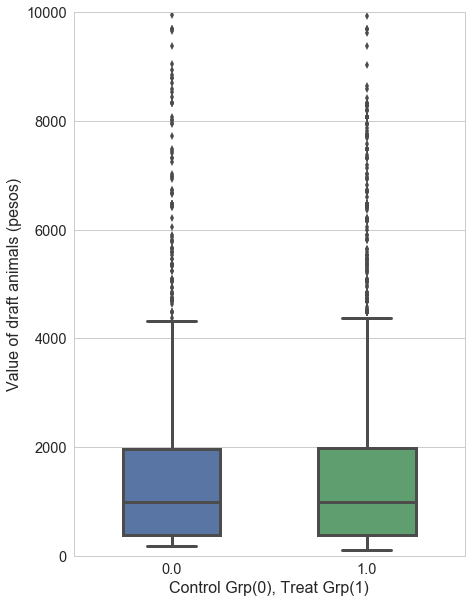

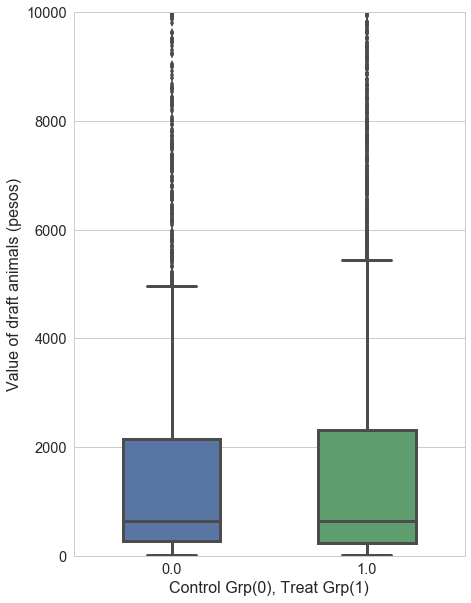

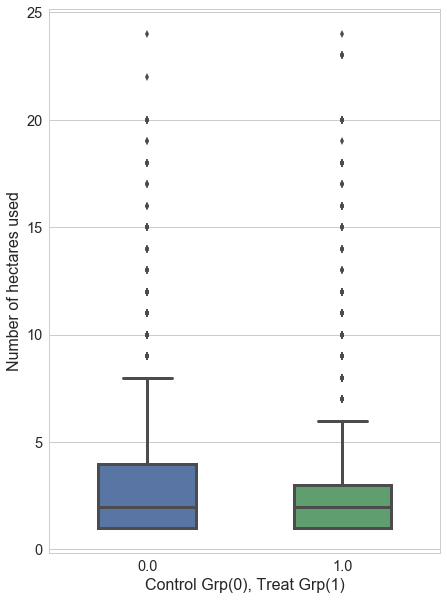

In [111]:
#Plotting for value of draft animals (pesos)
inv_val_draft= inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2['Value of draft animals (pesos)'] >0)]
k=sns.boxplot(data=inv_val_draft, x='t2_c1_op', y='Value of draft animals (pesos)', width=.5)
k.set_ylim(0,10000)
k.set_ylabel("Value of draft animals (pesos)")
k.set_xlabel("Control Grp(0), Treat Grp(1)")
plt.show(k)

#Plotting for value of production animals
inv_val_prod= inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2['Value of prod. animals (pesos)'] >0)]
k=sns.boxplot(data=inv_val_prod, x='t2_c1_op', y='Value of prod. animals (pesos)', width=.5)
k.set_ylim(0,10000)
k.set_ylabel("Value of draft animals (pesos)")
k.set_xlabel("Control Grp(0), Treat Grp(1)")
plt.show(k)


#Plotting for # of heactare used

inv_ha= inv_2.loc[(inv_2["wave"] == 0) & (inv_2['ineligible']==0) & (inv_2['Number of hectares used'] >0)]
k=sns.boxplot(data=inv_ha, x='t2_c1_op', y='Number of hectares used', width=.5)
k.set_ylabel("Number of hectares used")
k.set_xlabel("Control Grp(0), Treat Grp(1)")
plt.show(k)


The distribution across the control and treatment groups look similar.

### KEY QUESTION 1

What is the impact of the program on beneficiaries' ownership of various agricultural assets?

General note about the regression analysis: the authors use many control variables to limit residual variance, includic socioeconomic charecteristics and baseline conditions for the relevant outcome variables.

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [27]:
# Reading the data
inv_2 = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

In [28]:
# For the short-term analysis we only need waves 2,3, and 4
inv_2 = inv_2.loc[inv_2['wave'].isin([2,3,4])]

In [29]:
#droping na of outcome vars and regressors
inv_2.dropna(subset=['ani1', 'ani2', 'land', 'vani1', 'vani2', 'ha', 't2_c1_op','nbani197', 'nbani297', 
                     'ha97', 'nbani197', 'nbani297', 'ha97', 'no497', 'big497', 'age_hh', 
                     'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 
                     'educ1_sp', 'dage0_7_97', 'dage8_17_97', 'dage18_54_97', 'hhsize97', 
                     'homeown97', 'dirtfloor97', 'electricity97', 'org_faenas', 'min_dist', 'lnup_cwagepm',
                     'up2_mcwagepm', 'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp',
                     'dummy_educ_sp', 'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97'], inplace=True)

In [30]:
inv_2_waves = pd.get_dummies(inv_2['wave'])

In [31]:
inv_2_waves.rename(columns={2: 'wave2', 3: 'wave3', 4: 'wave4'}, inplace=True)

In [32]:
inv_2 = pd.concat([inv_2, inv_2_waves], axis=1)

In [33]:
inv_2.dropna(subset=['wave3', 'wave4'], inplace=True)

In [34]:
# Impact of treatment on draft animal ownership

x = inv_2[['t2_c1_op', 'wave3', 'wave4', 'nbani197', 'nbani297', 'ha97', 'ha97', 'nbani197', 'nbani297', 'ha97', 'no497', 'big497', 'age_hh', 
                     'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 
                     'educ1_sp', 'dage0_7_97', 'dage8_17_97', 'dage18_54_97', 'hhsize97', 
                     'homeown97', 'dirtfloor97', 'electricity97', 'org_faenas', 'min_dist', 'lnup_cwagepm',
                     'up2_mcwagepm', 'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp',
                     'dummy_educ_sp', 'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97']]
y= inv_2[['ani1']]
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   ani1   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:18:59   Log-Likelihood:                -17145.
No. Observations:               33103   AIC:                         3.436e+04
Df Residuals:                   33067   BIC:                         3.466e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0893    

#### The regression output shows that the treatment had a positive impact with 95% confidence interval: beneficiary households are 4.2% more likely to own a draft animal as part of their agricultural assets.






What about the value of the animals the household owns?
As shown in the regression output below, treatment households saw an increase of $65 pesos to the value of their draft animals.

In [35]:

x = inv_2[['t2_c1_op','wave3', 'wave4', 'nbani197', 'nbani297', 'ha97', 'ha97', 'nbani197', 'nbani297', 'ha97', 'no497', 'big497', 'age_hh', 
                     'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 
                     'educ1_sp', 'dage0_7_97', 'dage8_17_97', 'dage18_54_97', 'hhsize97', 
                     'homeown97', 'dirtfloor97', 'electricity97', 'org_faenas', 'min_dist', 'lnup_cwagepm',
                     'up2_mcwagepm', 'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp',
                     'dummy_educ_sp', 'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97']]
y= inv_2[['vani1']]
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  vani1   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     237.0
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:18:59   Log-Likelihood:            -2.7078e+05
No. Observations:               33103   AIC:                         5.416e+05
Df Residuals:                   33067   BIC:                         5.419e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -590.8306    

### KEY QUESTION 2

What is the impact of the program on consumption in the long-term? Is the program improving beneficiaries' living standards after four year of receiving cash transfers? 

The authors use consumption as a measure of living standards. We are looking at long-term effects, so we will only use the latest wave (wave 7) in the panel, collected in 2003.

Note: the authors divide the consumption variable ('consumo_pp_ae2') into 200 bins and drop the top 1 and bottom 200 bins from the sample.

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [42]:
#read investment data
investments = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

In [43]:
#mask wave 7 to get 2003 data and drop obvs with no consumption data
investments = investments.loc[(investments['wave']==7) & (investments['consumo']!=0)]
investments.dropna(subset=['consumo'], inplace = True)

In [44]:
#mask out 1 (poorest hh) ntile and 200 (richest hh) ntile of consumption
investments =  investments.loc[(investments['consumo_pp_ae2'] > 22.2066) & (investments['consumo_pp_ae2'] < 1118.53)]

In [45]:
#dropping na of outcome vars and regressors
investments.dropna(subset=['consumo_pp_ae2','t2_c1_op', 'hhsize_ae2_97', 'nbani197', 'nbani297', 'ha97', 'no497',
'big497', 'age_hh', 'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 'educ1_sp', 'dage0_7_97',
'dage8_17_97', 'dage18_54_97', 'homeown97', 'dirtfloor97', 'electricity97','lnup_cwagepm', 'up2_mcwagepm',
'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp', 'dummy_educ_sp',
'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97'], inplace=True)

In [46]:
#regression
x = investments[['t2_c1_op', 'hhsize_ae2_97', 'nbani197', 'nbani297', 'ha97', 'no497',
'big497', 'age_hh', 'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 'educ1_sp', 'dage0_7_97',
'dage8_17_97', 'dage18_54_97', 'homeown97', 'dirtfloor97', 'electricity97','lnup_cwagepm', 'up2_mcwagepm',
'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp', 'dummy_educ_sp',
'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97']]
y= investments[['consumo_pp_ae2']]
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:         consumo_pp_ae2   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     43.30
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          1.54e-238
Time:                        19:48:09   Log-Likelihood:                -64295.
No. Observations:               10271   AIC:                         1.287e+05
Df Residuals:                   10240   BIC:                         1.289e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 250.4312    

#### The regression result shows that receiving the cash transfers increased household consumption by 13.3 Mexican pesos. This is relevant, given that in 2003 the official minimum wage in the poorest areas of the country was 40 pesos.

### KEY QUESTION 3 

The Oportunidades program is likely to increase families' health status, given that one of the conditions they have to fulfill to receive cash transfers is going to the doctor. Could it be that the increase in living standards is driven by improvements in health rather than agricultural investments? 
The authors test the hypothesis that better health increases agricultural production (because people work more when they are healthier), and more agricultural production leads to more consumption.

For this analysis we will need to merge the investments data with information on health variables, which is contained in the dataset called morbidity. Here again, we are looking at long-term effects, so we will only use the latest wave (wave 7) in the panel, collected in 2003.

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [59]:
#read investment data
investments = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

In [60]:
#mask wave 7 to get 2003 data and drop obvs with no consumption data
investments = investments.loc[(investments['wave']==7) & (investments['consumo_pp_ae']!=0)]
investments.dropna(subset=['consumo_pp_ae'], inplace = True)

#mask out 1 (poorest hh) ntile and 200 (richest hh) ntile of consumption
iinvestments =  investments.loc[(investments['consumo_pp_ae2'] > 22.2066) & 
                                (investments['consumo_pp_ae2'] < 1118.53)]


In [61]:
#read morbidity data
morbidity = pd.DataFrame(pd.read_stata("adults_morbidity_03.dta",convert_categoricals=False))

# create age squared
morbidity['age_sq'] = morbidity['age']**2

In [62]:
#sorting the columns for joining
morbidity.sort_values(by=['folio', 'state', 'muni', 'local', 'wave'], 
                      ascending=[True, True, True, True, True])

investments.sort_values(by=['folio', 'state', 'muni', 'local', 'wave'], 
                        ascending=[True, True, True, True, True])

#merge investment and morbidity data
invest_morbi=pd.merge(investments, morbidity, on=('folio', 'state', 'muni', 'local', 'wave'), 
                      how='inner')


In [65]:
#mask age
invest_morbi = invest_morbi.loc[(invest_morbi['age']<65)]

#dropna from health outcome variables and regressors
invest_morbi.dropna(subset=['t2_c1_op','nbani197', 'nbani297','ha97', 'sick','inactivity', 
                            'days_sick', 'days_inactivity', 'female', 'hhsize_ae2_97','no497',
'big497', 'age_hh', 'age_hh2', 'female_hh', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 'educ1_sp', 'dage0_7_97',
'dage8_17_97', 'dage18_54_97', 'homeown97', 'dirtfloor97', 'electricity97','lnup_cwagepm', 'up2_mcwagepm',
'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp', 'dummy_educ_sp',
'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97'], inplace=True)

#### The regressions' p values for the variables 'sick' and 'inactivity' show that there is no significant difference between the health outcomes for treatment and control groups. 

#### Therefore, the increased consumption is not associated with improved health.

It is worth noting that the variables 'days sick' and 'days inactivity' do have statistically significant differences. They are also significant in the paper's results, but the authors still state that there are no differences in the long-term health between treatment and control. 

In [68]:
#regressions loop
health_outcomes= ['sick','inactivity','days_sick', 'days_inactivity']
for v in health_outcomes:
    
    x = invest_morbi[['t2_c1_op', 'nbani197', 'nbani297', 'ha97', 'age','age_sq', 'female', 'hhsize_ae2_97','no497',
'big497', 'educ1_hh', 'ethnicity_hh', 'age_sp', 'age_sp2', 'educ1_sp', 'dage0_7_97',
'dage8_17_97', 'dage18_54_97', 'homeown97', 'dirtfloor97', 'electricity97','lnup_cwagepm', 'up2_mcwagepm',
'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp', 'dummy_educ_sp',
'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97']]
 
    y= invest_morbi[[v]]
    x = sm.add_constant(x)
    est = sm.OLS(y, x).fit()
    print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   sick   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     23.80
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          5.83e-129
Time:                        20:34:45   Log-Likelihood:                -8178.2
No. Observations:               24902   AIC:                         1.642e+04
Df Residuals:                   24871   BIC:                         1.667e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003    

                            OLS Regression Results                            
Dep. Variable:              days_sick   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     15.86
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           7.67e-81
Time:                        20:34:45   Log-Likelihood:                -68686.
No. Observations:               24902   AIC:                         1.374e+05
Df Residuals:                   24871   BIC:                         1.377e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3145    

### KEY QUESTION 4

Is there any other variable that masks the impact of CCT on agricultural investment?

The original regression checks the effect of Conditional Cash Transfer(CCT) on six agricultural investment indicators while controlling for >30 other variables such as age of household, ethnicity as well as indicators of economic status. 

We wanted to check whether the existence of manufacturing employers in a municipality affects the relationship between CCT and agricultural investment. For example the effect might be overstated in municipalities with high level of industrial output because residents might be less reliant on agricultural income. Therefore, we decided to include the variable “Total income for the supply of Manufacturing goods and services" for municipality level as this indicates presence of manufacturing jobs. 

To check this, we scraped an additional variable from Mexico's National Institute of Statistics and Geography (INEGI) website. This new independent variable indicates the manufacturing output of the municipality.

In [112]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [113]:
# Read the STATA dataset "investments_data" into pandas
inv_2 = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))

In [114]:
#In order to get the set of municipalities included in the experiment,
#we recreated the INEGI codes from the data available in the investment data set

# the codes are 5 digits (ex. 12004) where the first two digits are the state(12)
# and the next three(004) are the municipality in that state

inv_2['st_muni']=inv_2['state'].astype(str).str.cat(inv_2['muni'].astype(str).str.zfill(3))

#Get all unique INEGI municipality codes
c=inv_2['st_muni'].unique().tolist()


In [115]:
# Scrape the hidden API from the INEGI website for the
# indicator code "5300000098"
manu_data=pd.DataFrame()
for line in c:
    # Some municipalities dont have data for the indicator
    # Bypassing the error messages generated by such munis
    try:
        link=("http://www.beta.inegi.org.mx/app/api/indicadores/interna_v1_1//ValorIndicador/5300000098/{}/null/es/null/null/3/pd/null/null/null/null/null/xml/563cbaa8-58bb-fef8-6763-1f1dae318f99".format(line))
        resp = requests.get(link)
        xml = resp.content
        soup = bs(xml, "lxml")

        #Find the name of the municipalities
        name=soup.find("municipality")
        n=name.find('a:value').contents[0]

        #Find the data for the indicator for all the avalilable years
        values=soup.find("value").findChildren()
        v=[]
        for i in range(0,len(values)):
            v.append(values[i].contents[0])

        #Find years for which data is available
        period=soup.find("periods").findChildren()
        p3=period[int(len(period)/4+1)].findChildren()
        p=[]
        # length of the tag varies according to the number of years
        # for which data is available
        if len(p3)==9:
            for i in (2,5,8):
                p.append(p3[i].contents[0])
            colnames=["code","name",p[0],p[1],p[2]]
            list=[(line,n,v[0],v[1],v[2])]
        elif len(p3)==6:
            for i in (2,5):
                p.append(p3[i].contents[0])
            colnames=["code","name",p[0],p[1]]
            list=[(line,n,v[0],v[1])]
        else:
            p.append(p3[2].contents[0])
            colnames=["code","name",p[0]]
            list=[(line,n,v[0])]

        #Append all data for the specific muni into "data"
        data=pd.DataFrame(list,columns=colnames)
        #Apend data from particular muni into overall dataset
        manu_data=manu_data.append(data,ignore_index=True)

    except:
        pass

# Write the file as CSV
manu_data.to_csv("muni_manu_data.csv", sep=',', encoding='utf-8',index=False)


#### To retrieve information

We found the list of municipalities included in the data set. See lines 1=17
Using Chrome's developer tools, we tracked network activity that the page is conducting to get the information for display
The webpage was using the the following hidden API:
            http://www.beta.inegi.org.mx/app/api/indicadores/interna_v1_1//ValorIndicador/5300000098/12002/null/es/null/null/3/pd/null/null/null/null/null/xml/563cbaa8-58bb-fef8-6763-1f1dae318f99
    
5300000098 is the indicator number for the desired variable and 12002 is the code for the municipality that we requesting the data for.

We used this API which used a hidden public key and allowed unrestricted access to the data (lines 18 - 61)

We retrieved the value of the variable for the 191 municipalities included in the experiment.


In [116]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [117]:
#read data
inv_1 = pd.DataFrame(pd.read_stata("investments_data.dta", convert_categoricals=False))
muni_data=pd.DataFrame(pd.read_csv("muni_manu_data.csv"))

Merge the scraped csv file with the investment data set at municipality level; using the the newly created variable ‘st_muni’ to reflect the INEGI codes.(line 14-29)

We decided to use 1998 data as it was deemed to be the most representative of the period under consideration. Then we ran regression. (lines 46-68)


In [118]:
##Merge inv_1 with muni data on st_muni and convert 1998 data into integer for regression

#Create the st_muni variable in Investment data
inv_1['st_muni']=(inv_1['state'].astype(str).str.cat(inv_1['muni'].astype(str).str.zfill(3)))
inv_1['st_muni']=inv_1['st_muni'].astype(int)

muni_data=muni_data.rename(columns = {'code':'st_muni'})

#replace ',' and trailing characters
muni_data['1998']=muni_data['1998'].str.replace(',', '')
muni_data['1998']=muni_data['1998'].str.strip('.00')

muni_data['2003']=muni_data['2003'].str.replace(',', '')
muni_data['2003']=muni_data['2003'].str.strip('.00')

# merging on
inv_2=pd.merge(inv_1, muni_data, on=('st_muni'), how='inner')

In [119]:
#drop nas and convert to int and convert to billion pesos (original data was in '000 pesos)
inv_2 = inv_2.dropna(subset = ['1998'])
inv_2['1998']=inv_2['1998'].astype(int)/1000000

#mask waves 2,3, 4
inv_2 = inv_2.loc[inv_2['wave'].isin([2,3,4])]

#drop obs with missing ani1, ani2, land, ha, me (relevant outcome vars)
inv_2.dropna(subset=['ani1', 'ani2', 'land', 'me', 'ha'], inplace=True)

#create dummies for waves 2,3,4
inv_2_waves = pd.get_dummies(inv_2['wave'])
inv_2_waves.rename(columns={2: 'wave2', 3: 'wave3', 4: 'wave4'}, inplace=True)
inv_2 = pd.concat([inv_2, inv_2_waves], axis=1)


In [120]:
#group outcome vars= anil1, anil2, land, vanil1, vanil2, ha
outcome_vars= ['ani1', 'ani2', 'land', 'vani1', 'vani2', 'ha']
for i in outcome_vars:

    x = inv_2[['t2_c1_op', 'nbani197', 'nbani297', 'ha97', '1998', 'age_hh', 'age_hh2', 'female_hh', 'educ1_hh',
               'ethnicity_hh','age_sp', 'age_sp2', 'educ1_sp', 'dage0_7_97', 'dage8_17_97', 'dage18_54_97', 'dage55p_97',
               'hhsize97', 'homeown97', 'dirtfloor97', 'electricity97', 'org_faenas', 'min_dist', 'lnup_cwagepm',
               'up2_mcwagepm', 'dummy_age_hh', 'dummy_educ_hh', 'dummy_ethnicity_hh', 'dummy_age_sp', 'dummy_educ_sp',
               'dummy_dage0_7_97', 'dummy_dirtfloor97', 'dummy_electricity97']]
    y= inv_2[[i]]
    x = sm.add_constant(x)
    est = sm.OLS(y, x,missing='drop').fit()
    print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   ani1   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:52:07   Log-Likelihood:                -17141.
No. Observations:               32855   AIC:                         3.435e+04
Df Residuals:                   32821   BIC:                         3.464e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1842    

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     163.1
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:52:08   Log-Likelihood:                -20634.
No. Observations:               32855   AIC:                         4.134e+04
Df Residuals:                   32821   BIC:                         4.162e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0942    

                            OLS Regression Results                            
Dep. Variable:                  vani2   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     311.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:52:08   Log-Likelihood:            -3.0590e+05
No. Observations:               32855   AIC:                         6.119e+05
Df Residuals:                   32821   BIC:                         6.121e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1056.4777    

#### Effect of probability of ownership

As expected including the variable changes the effect of CCT on the agricultural investment. The statistically significant negative coefficient of manufacturing indicates in municipalities with high manufacturing income, cash transfer has lower impact on the probability of ownership of animals or land because of the availability of manufacturing jobs. 


#### Effect of value of investment

In manufacturing municipalities, cash transfer has higher impact on the value of animals. This is possibly because those who buy animals are able to invest more in them because they are getting income from manufacturing jobs to supplement their cash transfer.
